In [1]:
from impact_score.model.lgbm_model import ValorantLGBM
from matplotlib import pyplot as plt
import lightgbm
from impact_score.model.lgbm_loader import load_lgbm
import pandas as pd

vm: ValorantLGBM = load_lgbm()
model: lightgbm.LGBMClassifier = vm.model

Model path: E:\Python\Datascience_impact\impact_score\model\model.pkl
Model loading time: 0.006593800000000094


In [2]:
from impact_score.impact.match_analysis import RoundReplay

rr_instance = RoundReplay()
rr_instance.set_match(54261)
rr_instance.choose_round(21)
aux = rr_instance.get_round_probability(side="atk")
pd.DataFrame(aux)

Analyser created!
Model path: E:\Python\Datascience_impact\impact_score\model\model.pkl
Model loading time: 0.011110900000000257
Round 21 selected


,Round,EventID,EventType,Probability_before_event,Probability_after_event,Impact
177,21,0,start,0.486301,0.486301,0.000000
178,21,7141584,kill,0.441045,0.309255,0.131789
179,21,7141585,kill,0.309255,0.125825,0.183431
180,21,7141589,kill,0.122839,0.225519,0.102680
181,21,7141590,kill,0.199057,0.436173,0.237116
182,21,7141588,kill,0.400459,0.141609,0.258850
183,21,671491,plant,0.253490,0.253490,0.000000
184,21,7141586,kill,0.264939,0.078044,0.186895
185,21,7141582,kill,0.078044,0.213911,0.135867
186,21,7141583,kill,0.213911,0.547855,0.333944


In [7]:
model.feature_name_

['RegularTime',
 'SpikeTime',
 'DEF_operators',
 'Loadout_diff',
 'ATK_kills',
 'ATK_Initiator',
 'ATK_Duelist',
 'ATK_Sentinel',
 'ATK_Controller',
 'DEF_kills',
 'DEF_Initiator',
 'DEF_Duelist',
 'DEF_Sentinel',
 'DEF_Controller']

In [2]:
iex = vm.get_probability_input_example()
iex

{'RegularTime': 0,
 'SpikeTime': 0,
 'ATK_loadoutValue': 20750,
 'ATK_Initiator': 2,
 'ATK_Duelist': 1,
 'ATK_Sentinel': 1,
 'ATK_Controller': 1,
 'ATK_kills': 1,
 'DEF_loadoutValue': 23700,
 'DEF_operators': 0,
 'DEF_kills': 1,
 'DEF_Initiator': 2,
 'DEF_Duelist': 1,
 'DEF_Sentinel': 1,
 'DEF_Controller': 1}

In [3]:
iem = vm.get_probability_input_example()
regular_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
spike_times = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
regular_proba = []
spike_proba = []
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for x in regular_times:
    iem["RegularTime"] = x
    regular_proba.append(vm.test_probability(iem))
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for y in spike_times:
    iem["SpikeTime"] = y
    spike_proba.append(vm.test_probability(iem))

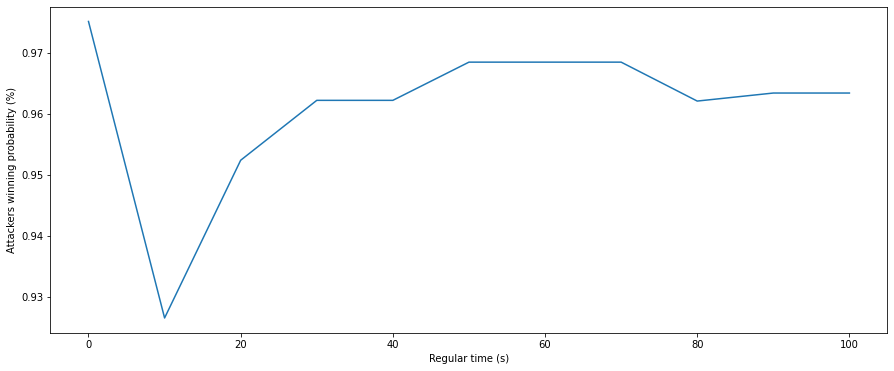

In [4]:
plt.figure(figsize=(15, 6))
plt.xlabel("Regular time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(regular_times, regular_proba)
plt.show()

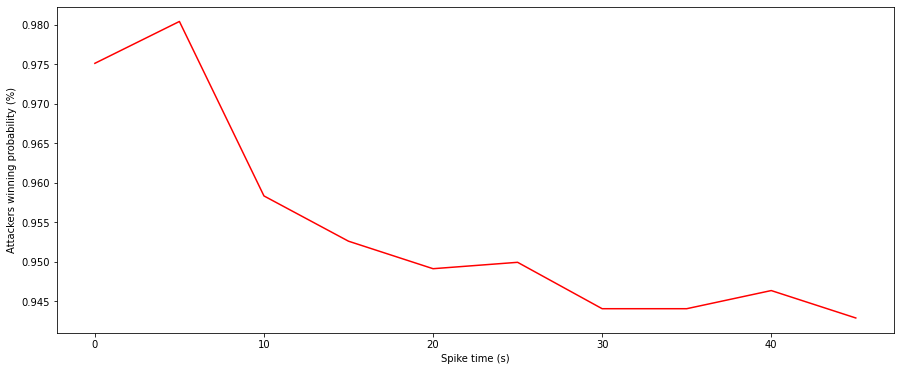

In [5]:
plt.figure(figsize=(15, 6))
plt.xlabel("Spike time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(spike_times, spike_proba, color="red")

In [14]:
vm.model.predict_proba(pd.DataFrame([iem]))

array([[0.08083727, 0.91916273]])

In [28]:
iem["RegularTime"] = 60
iem["SpikeTime"] = 0

In [31]:
vm.test_probability(iem)

0.4335205369012173